# Residuals Analysis


In [1]:
!gdown https://drive.google.com/uc?id=1-06Gi5EkV3kmOlO_fkRhFrgJDMi-oaYk

Downloading...
From: https://drive.google.com/uc?id=1-06Gi5EkV3kmOlO_fkRhFrgJDMi-oaYk
To: /content/SALESADVMLR2.xlsx
100% 12.1k/12.1k [00:00<00:00, 18.5MB/s]


In [2]:
import pandas as pd
dataset = pd.read_excel("SALESADVMLR2.xlsx")

In [3]:
dataset

,TV,Radio,Newspaper,AdType,Season,Country,Sales
0,230.1,37.8,69.2,AdType3,Christmas,0,22.1
1,44.5,39.3,45.1,AdType2,Standard,1,10.4
2,17.2,45.9,69.3,AdType1,Standard,1,12.0
3,151.5,41.3,58.5,AdType4,Summer,0,16.5
4,180.8,10.8,58.4,AdType4,Summer,1,17.9
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,AdType2,Standard,0,7.6
196,94.2,4.9,8.1,AdType1,Standard,0,14.0
197,177.0,9.3,6.4,AdType1,Summer,1,14.8
198,283.6,42.0,66.2,AdType3,Christmas,1,25.5


In [4]:
# Create dummy variables
AdType = pd.get_dummies(dataset['AdType'])
Season = pd.get_dummies(dataset['Season'])

# Add dummy variables to the dataset
dataset = pd.concat([dataset, AdType, Season], axis=1)

In [5]:
dataset

,TV,Radio,Newspaper,AdType,Season,Country,Sales,AdType1,AdType2,AdType3,AdType4,Christmas,Standard,Summer
0,230.1,37.8,69.2,AdType3,Christmas,0,22.1,0,0,1,0,1,0,0
1,44.5,39.3,45.1,AdType2,Standard,1,10.4,0,1,0,0,0,1,0
2,17.2,45.9,69.3,AdType1,Standard,1,12.0,1,0,0,0,0,1,0
3,151.5,41.3,58.5,AdType4,Summer,0,16.5,0,0,0,1,0,0,1
4,180.8,10.8,58.4,AdType4,Summer,1,17.9,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,AdType2,Standard,0,7.6,0,1,0,0,0,1,0
196,94.2,4.9,8.1,AdType1,Standard,0,14.0,1,0,0,0,0,1,0
197,177.0,9.3,6.4,AdType1,Summer,1,14.8,1,0,0,0,0,0,1
198,283.6,42.0,66.2,AdType3,Christmas,1,25.5,0,0,1,0,1,0,0


In [6]:
import statsmodels.api as sm
import numpy as np

# Select the predictors and the target for the best model
target = dataset["Sales"]
predictors = dataset.drop(["Sales", "AdType", "Season", "Country", "Newspaper"], axis=1)

# Add a column of ones to X for the intercept
predictors = sm.add_constant(predictors)

# Fit the model using statsmodels
model = sm.OLS(target, predictors).fit()

# Get a summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     465.1
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          9.69e-117
Time:                        19:44:26   Log-Likelihood:                -327.42
No. Observations:                 200   AIC:                             670.8
Df Residuals:                     192   BIC:                             697.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0617      0.348     17.419      0.0

## OLS Residuals Plots Function

This function was developed specifically for this course in order to have a useful tool for analyzing the residuals plots.

In [20]:
def ols_resid_plots(model):
    import numpy as np
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    from statsmodels.stats.outliers_influence import OLSInfluence
    from statsmodels.nonparametric.smoothers_lowess import lowess

    # Generate the residual values
    residuals = model.resid
    standardized_residuals = OLSInfluence(model).resid_studentized_internal
    fitted_values = model.fittedvalues
    leverage = OLSInfluence(model).hat_matrix_diag
    influence = OLSInfluence(model)
    cooks_d = influence.cooks_distance[0]

    # Number of rows needed for subplots
    nrows = 2
    fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows * 6), squeeze=False)


    # Residuals vs Fitted plot
    axs[0, 0].scatter(fitted_values, residuals, alpha=0.5)
    axs[0, 0].axhline(y=0, color='gray', linestyle='--')
    axs[0, 0].set_xlabel('Fitted values')
    axs[0, 0].set_ylabel('Residuals')
    smooth_data = lowess(residuals, fitted_values)
    axs[0, 0].plot(smooth_data[:, 0], smooth_data[:, 1], color='red', alpha=0.5, lw=2)

    # QQ plot for standardized residuals
    sm.graphics.qqplot(standardized_residuals, ax=axs[0, 1], line='45')

    # Scale-Location plot
    axs[1, 0].scatter(fitted_values, np.sqrt(np.abs(standardized_residuals)), alpha=0.5)
    axs[1, 0].set_xlabel('Fitted values')
    axs[1, 0].set_ylabel('sqrt(|Standardized residuals|)')
    smooth_data = lowess(np.sqrt(np.abs(standardized_residuals)), fitted_values)
    axs[1, 0].plot(smooth_data[:, 0], smooth_data[:, 1], color='red', alpha=0.5)

    # Cook's distance plot replacing the previous Leverage vs Standardized Residuals plot
    axs[1, 1].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
    axs[1, 1].set_xlabel('Observation index')
    axs[1, 1].set_ylabel("Cook's distance")
    cook_threshold = 4 / (len(residuals) - model.df_model)
    axs[1, 1].axhline(y=cook_threshold, linestyle="--", color="red", label=f'Cook\'s Distance Threshold: {cook_threshold:.3f}')
    axs[1, 1].legend()

    # Annotate observations with high Cook's distance
    for i in np.where(cooks_d > cook_threshold)[0]:
        axs[1, 1].annotate(i, xy=(i, cooks_d[i]), color='red')

    plt.show()


<ipython-input-20-49d7f2dac43d>:40: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  axs[1, 1].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)


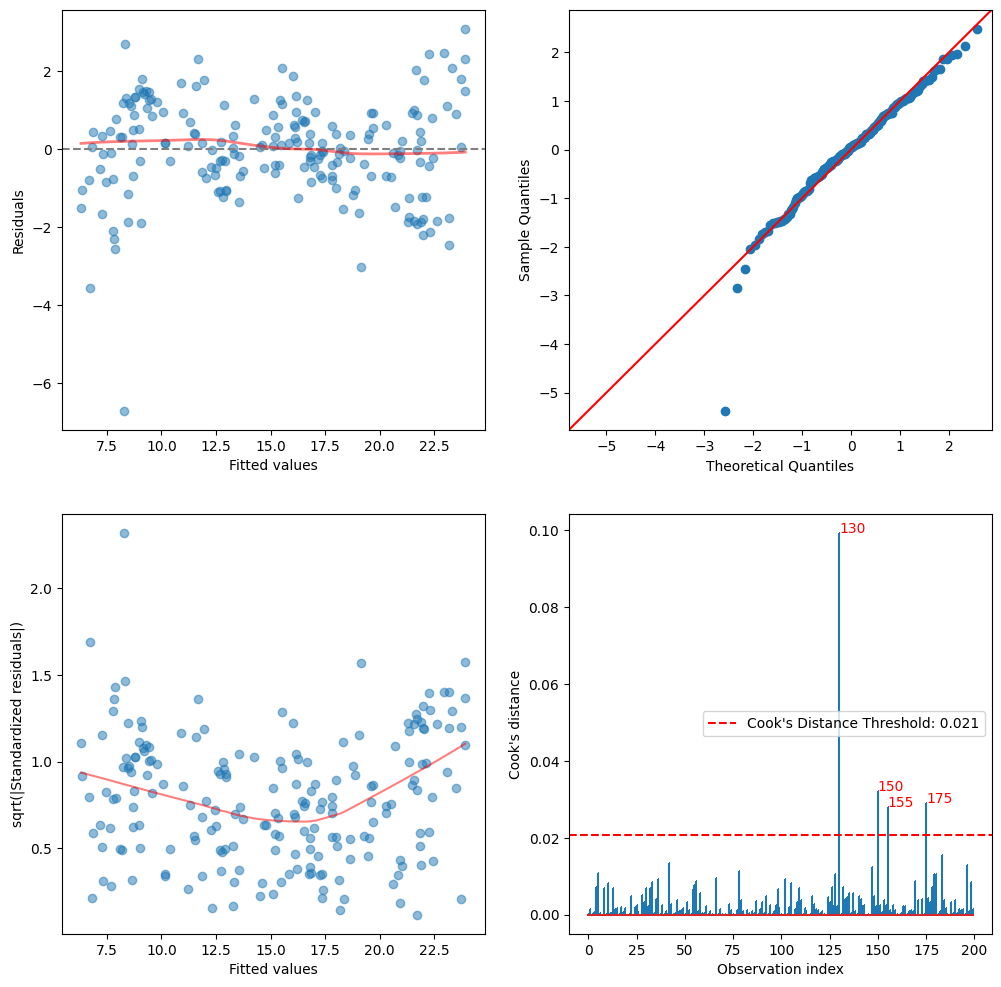

In [21]:
ols_resid_plots(model)

## Durbin Watson test

In [22]:
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Get the Durbin-Watson test statistic
dw = durbin_watson(model.resid)
print("Durbin-Watson test statistic:", dw)

Durbin-Watson test statistic: 2.32172843584662
